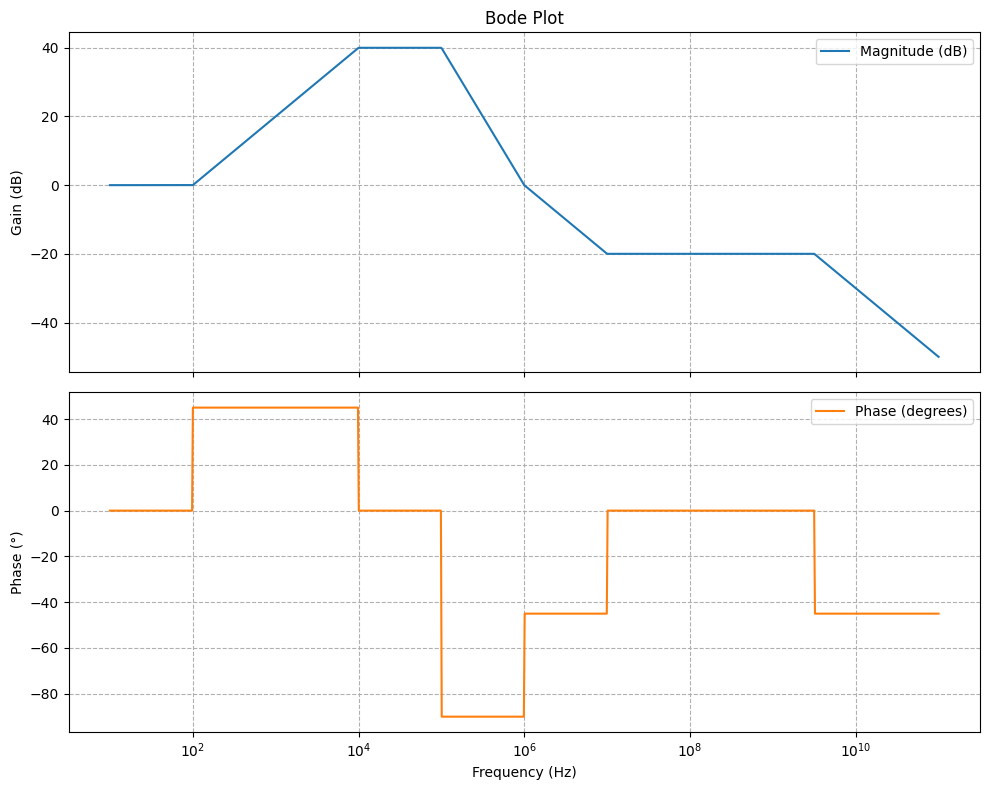

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency range for Bode plot (log scale)
frequencies = np.logspace(1, 11, 1000)  # from 10^1 to 10^11 Hz

# Given poles and zeros frequencies in Hz
zeros = [1e2, 1e6, 1e7]  # Zero frequencies
poles = [1e4, 1e5, 1e5, 10**9.5]  # Pole frequencies (including the squared term at 1e5)

# Define initial gain in dB
initial_gain = 0  # Starting gain at 0 dB

# Function to calculate the magnitude in dB
def calculate_magnitude(frequencies, zeros, poles, initial_gain):
    magnitude = np.full_like(frequencies, initial_gain, dtype=float)

    for z in zeros:
        magnitude += 20 * np.log10(frequencies / z) * (frequencies >= z)

    for p in poles:
        magnitude -= 20 * np.log10(frequencies / p) * (frequencies >= p)

    return magnitude

# Function to calculate the phase in degrees
def calculate_phase(frequencies, zeros, poles):
    phase = np.zeros_like(frequencies)

    for z in zeros:
        phase += 45 * (frequencies >= z)

    for p in poles:
        phase -= 45 * (frequencies >= p)

    return phase

# Calculate magnitude and phase
magnitude = calculate_magnitude(frequencies, zeros, poles, initial_gain)
phase = calculate_phase(frequencies, zeros, poles)

# Plotting the Bode plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Magnitude plot
ax1.semilogx(frequencies, magnitude, label="Magnitude (dB)", color="tab:blue")
ax1.set_title("Bode Plot")
ax1.set_ylabel("Gain (dB)")
ax1.grid(True, which="both", linestyle="--")
ax1.legend()

# Phase plot
ax2.semilogx(frequencies, phase, label="Phase (degrees)", color="tab:orange")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Phase (°)")
ax2.grid(True, which="both", linestyle="--")
ax2.legend()

plt.tight_layout()
plt.show()
